# chi2_and_cramels_v

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt


In [2]:
# マンガでわかる統計学: p127- 133
observed = np.array([
    [34, 61, 53],
    [38, 40, 74]
])
observed

array([[34, 61, 53],
       [38, 40, 74]])

In [3]:
def my_chi2_contingency(observed):
    """pearson chi2

    observed type is ndarray.
    observed shape length is 2.
    """
    n = observed.sum()
    colsum = observed.sum(axis=1, keepdims=True)
    rowsum = observed.sum(axis=0, keepdims=True)
    outer = colsum @ rowsum

    # not using np.dot
    outer = np.outer(observed.sum(axis=1),
                           observed.sum(axis=0))

    expected = outer / n
    with np.errstate(divide="ignore", invalid="ignore"):
        terms = (observed - expected) ** 2 / expected
        chi2 = np.sum(terms)

    dof = np.product(np.array(observed.shape) - 1)
    p = 1 - scipy.stats.chi2.cdf(chi2, dof)

    """
    # scipy
    dof = expected.size - sum(expected.shape) + expected.ndim - 1
    size = observed.size
    ddof = np.array(size - 1 - dof)
    num_obs = scipy.stats.stats._count(terms, axis=None)
    
    print("dof:", dof)
    print("size", size)
    print("ddof:", ddof)
    print("num_obs:", num_obs)
    print("num_obs - 1 - ddof:", num_obs - 1 - ddof)
    p = scipy.stats.chi2.sf(chi2, num_obs - 1 - ddof)
    """

    return (chi2, p, dof, expected)

In [4]:
(
    scipy.stats.chi2_contingency(observed),
    "",
    my_chi2_contingency(observed),
)

((8.0090903057107159,
  0.018232580410070073,
  2,
  array([[ 35.52      ,  49.82666667,  62.65333333],
         [ 36.48      ,  51.17333333,  64.34666667]])),
 '',
 (8.0090903057107159,
  0.018232580410070032,
  2,
  array([[ 35.52      ,  49.82666667,  62.65333333],
         [ 36.48      ,  51.17333333,  64.34666667]])))

In [5]:
def cramers_v(observed):
    chi2, _, _, _ = my_chi2_contingency(observed)
    n = observed.sum()
    return np.sqrt(chi2 / (n * (min(observed.shape) - 1)))

In [6]:
(
    cramers_v(np.array([
        [34, 61, 53],
        [34, 61, 53],
    ])),
    cramers_v(np.array([
        [34, 61, 0],
        [0, 0, 53],
    ]))
)

(0.0, 1.0)

In [7]:
def cramers_v_list(mesh_a1, mesh_a2):
    a1 = mesh_a1.flatten()
    a2 = mesh_a2.flatten()
    b = np.c_[a1, a2, 100 - a1, 100 - a2]
    return np.apply_along_axis(
        lambda x: cramers_v(x.reshape(2, 2, order="F")), 
        axis=1, arr=b
    )


(-5, 105)

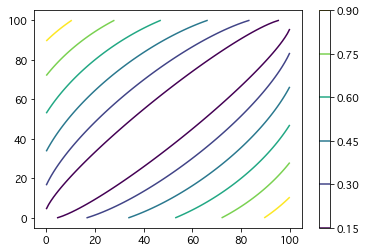

In [8]:
a = np.arange(0, 100 + 1)
mesh_a1, mesh_a2 = np.meshgrid(a, a)
quad_contour_set = plt.contour(mesh_a1, mesh_a2,
                                           cramers_v_list(mesh_a1, mesh_a2).reshape(mesh_a1.shape))

plt.colorbar(quad_contour_set, )
plt.xlim((-5, 105))
plt.ylim((-5, 105))